<a href="https://colab.research.google.com/github/keerthana01994831/cs480student/blob/main/CS480_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

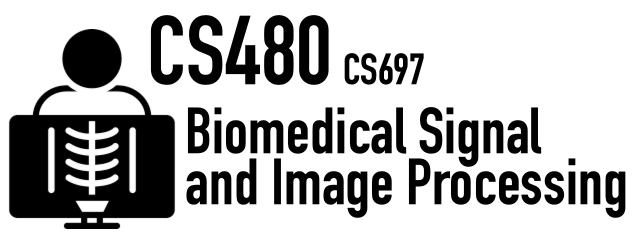
#Assignment 4

In [ ]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia!

In [ ]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# we are using mahotas again, so lets install it!
!pip install mahotas

In [ ]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

**Task 1:** Download, extract, and load the data! [15 Points]

In [ ]:
# Please download this file: https://cs480.org/data/xray.zip
# This is a subset of the Kaggle Pneumonia Dataset!
#
# TODO: Upload xray.zip using the file panel on the left.

In [ ]:
# Run this code to extract the zip file and to create
# the folder structure of normal/ and pneumonia/ images.
# Each folder contains the first images of the Kaggle dataset.
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/US Assignments/xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'

In [ ]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

In [ ]:
# TODO: Please display this image and print the dimensions!
# This will display the width, height and how many color channels the image has 
# Dimensions of the image
img.shape

(1858, 2090)

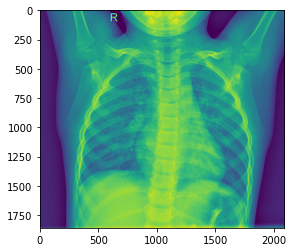

In [ ]:
# TODO: YOUR CODE
# Displaying  the image
pylab.imshow(img)

**Task 2:** Let's do some data wrangling and more visualization! [35 Points]

In [ ]:
# This code loads all normal images into a numpy array.
normal_files = os.listdir( NORMAL_DIR )

normal_images = np.zeros( (len(normal_files), 300, 300), dtype=np.float32)

for i in range(len(normal_files)):
  loaded_image = mh.imread( NORMAL_DIR + normal_files[i], as_grey=True )

  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  normal_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [ ]:
# This code loads all pneumonia images into a numpy array.
pneumonia_files = os.listdir( PNEUMONIA_DIR )

pneumonia_images = np.zeros( (len(pneumonia_files), 300, 300), dtype=np.float32)

for i in range(len(pneumonia_files)):
  loaded_image = mh.imread( PNEUMONIA_DIR + pneumonia_files[i], as_grey=True )
  
  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  pneumonia_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [ ]:
# The two code blocks above perform 2 data wrangling operations.
# Which ones?
# Hint: The first one might be more obvious but the second one happens in the
# last line of each block.
# TODO: Operation 1) YOUR ANSWER
# TODO: Operation 2) YOUR ANSWER

In Operation 1 the data is read and converted the loaded images into greyscale and thereafter it is resized into 300x300 pixel size

In Operation 2 the resized image pixels are replaced with numpy arrays 

In [ ]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

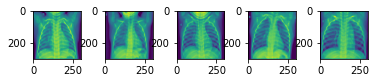

In [ ]:
# TODO: YOUR CODE
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(normal_images[i])
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

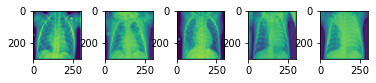

In [ ]:
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(pneumonia_images[i])
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

**Task 3:** Setup training and testing data. [15 Points]

In [ ]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays and pneumonia xrays.
#
# The training data will include 120 images (60 normal, 60 pneumonia).
# The testing data will include the remaining 80 images (40 normal, 40 pneumonia).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the training_target vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia.

In [ ]:
TRAINING_COUNT = 60

training_data = np.zeros( (TRAINING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[0:TRAINING_COUNT] ):
  training_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[0:TRAINING_COUNT] ):
  training_data[i + TRAINING_COUNT] = p.ravel()

In [ ]:
# TODO: Please create the training_target vector with 0 for a normal image, and
# 1 for a pneumonia.
# TODO

training_target = np.zeros((TRAINING_COUNT*2,1), dtype=int)
for i in range(0, TRAINING_COUNT):
  training_target[i][0] = 0
for i in range(TRAINING_COUNT, len(training_target)):
  training_target[i][0] = 1

In [ ]:
TESTING_COUNT = 40

testing_data = np.zeros( (TESTING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i + TESTING_COUNT] = p.ravel()

In [ ]:
# TODO: Please create the testing_target vector with 0 for a normal image, and
# 1 for a pneumonia.
# TODO

testing_target = np.zeros((TESTING_COUNT*2,1), dtype=int)
for i in range(0, TESTING_COUNT):
  training_target[i][0] = 0
for i in range(TESTING_COUNT, len(testing_target)):
  testing_target[i][0] = 1

**Task 4:** Let's train and evaluate the Random Forest! [35 Points]

In [ ]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [ ]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is 
# normal or pneumonia.
fitted = clf.fit( training_data, training_target )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
# TODO: In just a few sentences, please explain how the Random Forest works.

In [ ]:
# TODO: YOUR ANSWER


A supervised learning algorithm is random forest. The "forest" it creates is an ensemble of decision trees, which are typically trained using the "bagging" method. The bagging method is based on the idea that combining learning models improves the overall result. Random forest constructs multiple decision trees and merges them to produce a more accurate and stable prediction.
Random forest has a significant advantage in that it can be used for both classification and regression problems, which comprise the majority of current machine learning systems.

In [ ]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score(testing_data, testing_target)

0.9375

In [ ]:
# TODO: Is the classification accuracy good? And, are you surprised?


Novel classifiers always use accuracy scrore to evaluate the performance. The score of 0.85 - 0.90 is decent but, when considering the use case of the model it is not sufficient enough.  The model needs to predict the presence of pnemonia, hence false predictions might have great consequences.

In [ ]:

 # TODO: YOUR ANSWER

**Bonus:** Let's take a closer look! [33 Points]

In [ ]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(testing_data) for this.
# Can you display them?
# Do you have an idea why these images were problematic?

In [ ]:
predictions = clf.predict(testing_data)
predictions

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
import pandas as pd
missclassify = clf.predict(testing_data) != testing_target

In [ ]:
missclassify

array([[False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

In [ ]:
predictions = clf.predict(testing_data).tolist()
missclassification_normal = []
missclassification_pnemonia = []

In [ ]:
# TODO: YOUR CODE AND YOUR ANSWER

for i in range(0,len(predictions)):
  j = predictions[i]
  k = testing_target[i][0]
  if j != k:
    if i<40:
      missclassification_normal.append(i+60)
    else:
      missclassification_pnemonia.append(i+20)

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid

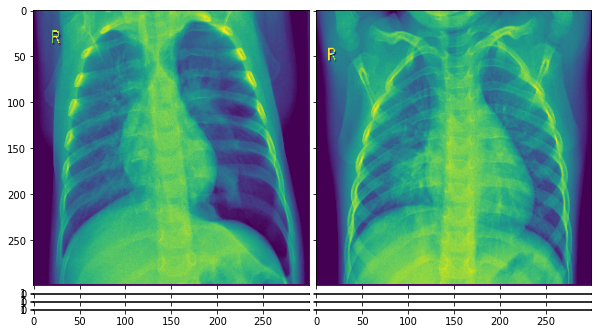

In [ ]:
fig = plt.figure(figsize=(10,10))
grid = ImageGrid(fig, 111, nrows_ncols=(4,2), axes_pad=0.1)

for ax, im in zip(grid, missclassification_pnemonia):
  ax.imshow(pneumonia_images[im])

In [ ]:
# TODO: How can we improve the classification performance?
# Hint: Ideas without code are fine as well.

In [ ]:
# TODO: YOUR ANSWER

There are many ways to improve, but it is especially important to use stratified cross-validation when there are large imbalances in the classes; for example, if all of the new images you added are "normal," it is not surprising that they don't help much. Second, if computationally feasible, a grid search to optimise the models' hyperparameters would be beneficial. Alternatively, use a hyperparameter optimization technique, such as auto-sklearn in Python. The hyperparameters can then be optimised in terms of AUC, F1, or another metric that better reflects performance than accuracy. However, regardless of the metric we use, this should improve your performance.

In [ ]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw

In [ ]:
collaboration with praveen ganni